In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
img = cv2.imread("testimage_lab_4.jpeg")


In [9]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

In [10]:
color_hist_b = cv2.calcHist([img], [0], None, [256], [0, 256])  
color_hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])  
color_hist_r = cv2.calcHist([img], [2], None, [256], [0, 256]) 

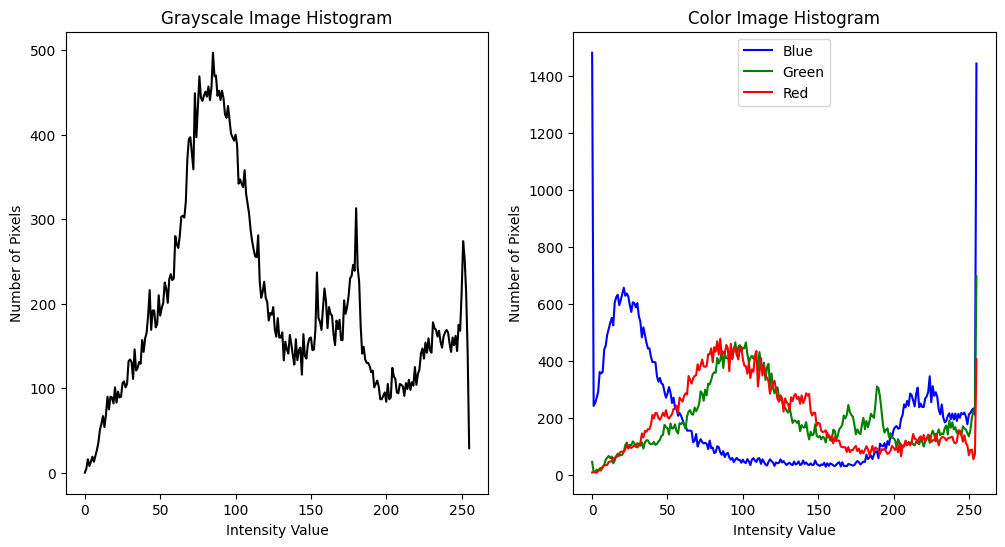

In [11]:
plt.figure(figsize=(12, 6))

# Grayscale histogram
plt.subplot(1, 2, 1)
plt.plot(gray_hist, color='black')
plt.title('Grayscale Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')

# Color histograms
plt.subplot(1, 2, 2)
plt.plot(color_hist_b, color='blue', label='Blue')
plt.plot(color_hist_g, color='green', label='Green')
plt.plot(color_hist_r, color='red', label='Red')
plt.title('Color Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')
plt.legend()

plt.show()

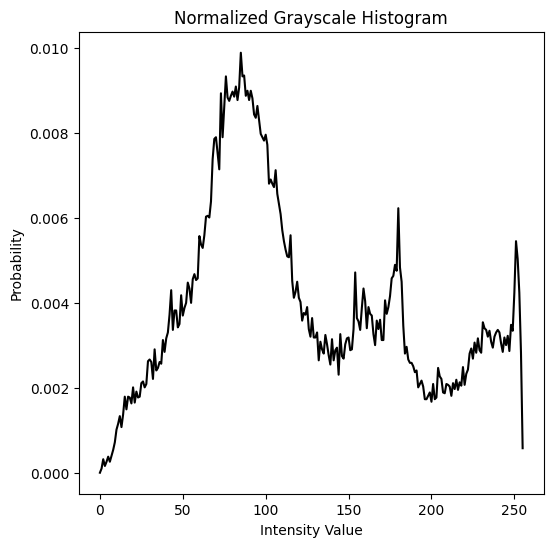

In [ ]:
gray_hist_prob = gray_hist / np.sum(gray_hist)


plt.figure(figsize=(6, 6))
plt.plot(gray_hist_prob, color='black')
plt.title('Normalized Grayscale Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Probability')
plt.show()

In [15]:


fshift = np.fft.fftshift(np.fft.fft2(gray_image))
magnitude_spectrum = np.log(np.abs(fshift) + 1)

img_reconstructed = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift)))

rotated_gray_image = cv2.rotate(gray_image, cv2.ROTATE_90_CLOCKWISE)
fshift_rotated = np.fft.fftshift(np.fft.fft2(rotated_gray_image))
magnitude_spectrum_rotated = np.log(np.abs(fshift_rotated) + 1)

Text(0.5, 1.0, 'Magnitude Spectrum')

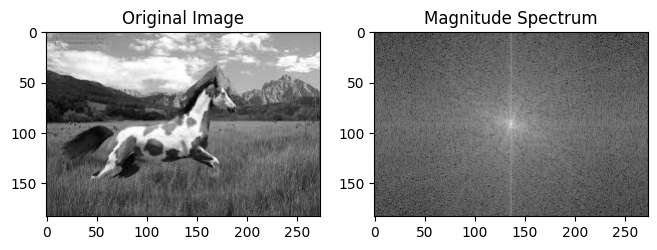

In [18]:
#original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')

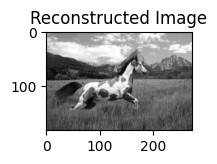

In [19]:
#inverse fft
plt.subplot(1, 3, 3)
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.show()


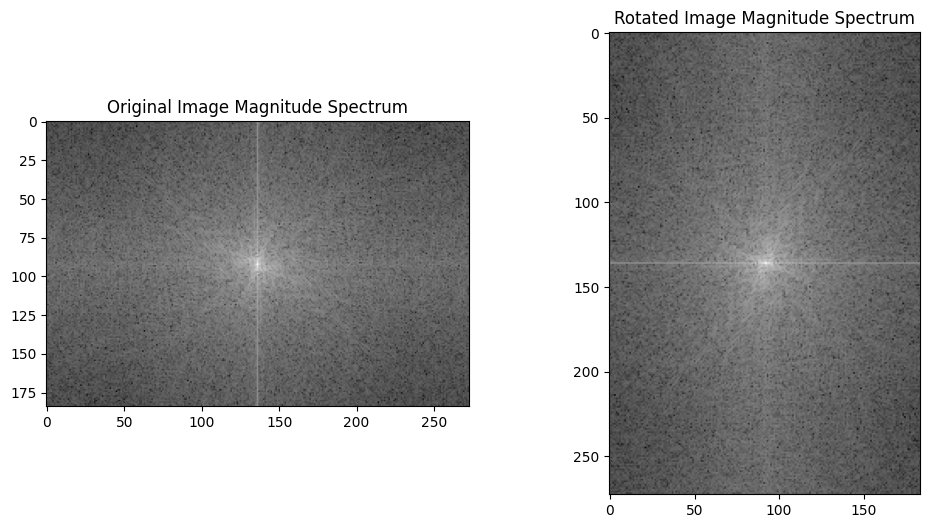

In [20]:
#rotated image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original Image Magnitude Spectrum')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.title('Rotated Image Magnitude Spectrum')

plt.show()